# Ukraine Russia War Twitter Sentiment Analysis

Bu not defteri, Ukrayna ve Rusya Savaşı üzerine yapılan Twitter duygu analizini geliştirmek amacıyla oluşturulmuştur.
Yapılan temel değişiklikler:
1. **WordCloud Maskeleme**: 'cloud.png' görseli kullanılarak kelime bulutunun bir bulut şeklinde oluşturulması sağlanmıştır.
2. **Duygu Sınıflandırması**: VADER analizi sonucunda elde edilen 'Compound' (Bileşik) skor kullanılarak tweetler 'Positive', 'Negative' ve 'Neutral' olarak sınıflandırılmıştır.
3. **Görselleştirme**: Duygu dağılımını gösteren grafikler eklenmiştir.
4. **Veri Temizleme**: Veri temizleme adımları korunmuş ve iyileştirilmiştir.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
import warnings
import numpy as np
from PIL import Image

warnings.filterwarnings('ignore')

# Gerekli NLTK paketlerini indir
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EYUPBAGDATLI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EYUPBAGDATLI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = pd.read_csv("data/filename.csv")
print("Veri setinin ilk 5 satırı:")
print(data.head())
print("\nSütunlar:")
print(data.columns)


Veri setinin ilk 5 satırı:
                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... N

In [3]:
data = data[["username", "tweet", "language"]]
print("\nEksik Veri Kontrolü:")
print(data.isnull().sum())
print("\nDil Dağılımı:")
print(data["language"].value_counts())



Eksik Veri Kontrolü:
username    0
tweet       0
language    0
dtype: int64

Dil Dağılımı:
language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
qht      20
ca       20
th       19
fr       18
de       14
ko        9
nl        8
vi        8
fi        7
ro        7
cs        6
zxx       6
uk        6
ar        6
zh        5
pl        5
qam       4
tl        4
da        3
hi        2
tr        2
no        2
eu        2
el        1
lv        1
hu        1
cy        1
bn        1
Name: count, dtype: int64


In [4]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["tweet"] = data["tweet"].apply(clean)
print("\nTemizlenmiş Tweetler (Örnek):")
print(data["tweet"].head())



Temizlenmiş Tweetler (Örnek):
0        nazijaeg derwen  russia place satan rule well
1    russia haarp could destroy usa one fell swoop ...
2         putin give steven seagal  order friendship  
3         mainelif baddcompani it alway project russia
4    pottingpink mfarussia modrussia milhistrf muze...
Name: tweet, dtype: object


cloud.png başarıyla yüklendi.


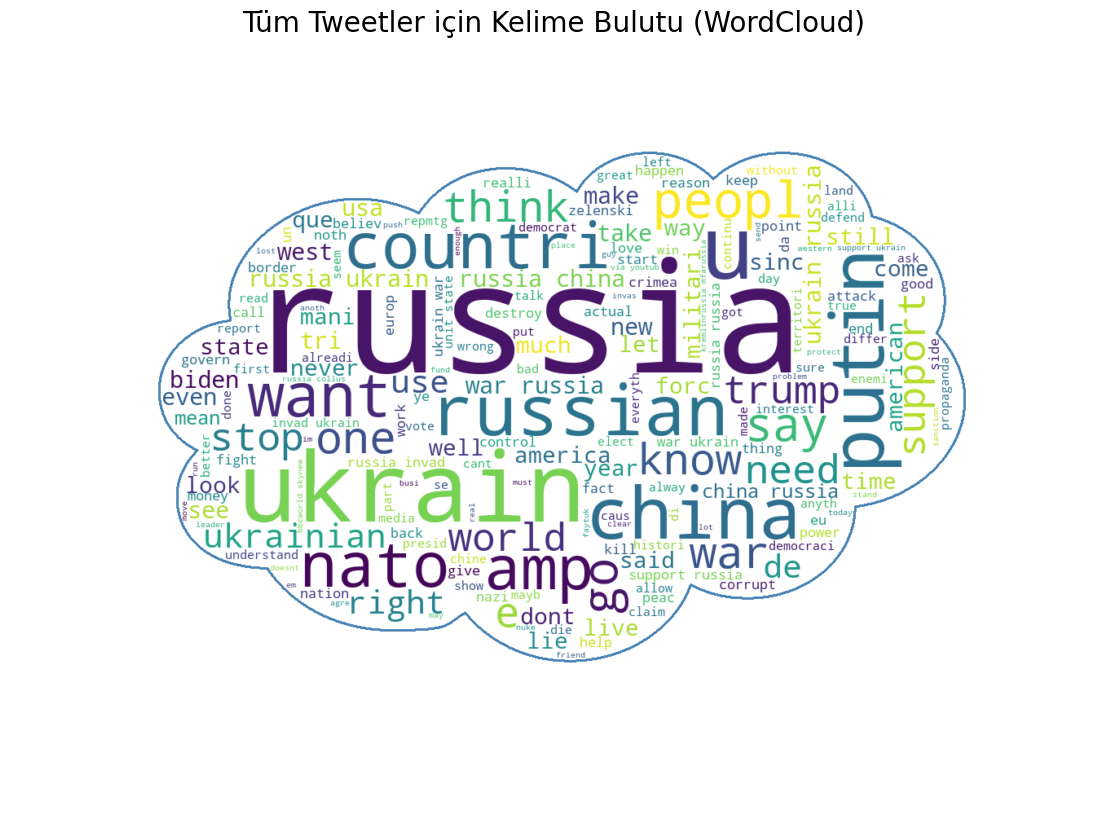

In [5]:
# WordCloud için metin birleştirme
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)

# Maske görselini yükleme (cloud.png)
try:
    cloud_mask = np.array(Image.open("cloud.png"))
    print("cloud.png başarıyla yüklendi.")
except FileNotFoundError:
    print("Hata: cloud.png dosyası bulunamadı. Lütfen dosyanın aynı dizinde olduğundan emin olun.")
    cloud_mask = None

# WordCloud oluşturma
# contour_width ve contour_color ile maskenin sınırlarını belirginleştiriyoruz
if cloud_mask is not None:
    wordcloud = WordCloud(stopwords=stopwords, 
                          background_color="white", 
                          mask=cloud_mask,
                          contour_width=3, 
                          contour_color='steelblue').generate(text)
else:
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Tüm Tweetler için Kelime Bulutu (WordCloud)", fontsize=20)
plt.show()


In [6]:
sentiments = SentimentIntensityAnalyzer()

# Compound skorunu da hesaplayarak daha iyi bir değerlendirme yapalım
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["tweet"]]

print(data.head())


      username                                              tweet language  \
0  tomasliptai      nazijaeg derwen  russia place satan rule well       en   
1  paperfloure  russia haarp could destroy usa one fell swoop ...       en   
2    katetbar1       putin give steven seagal  order friendship         en   
3    jlhrdhmom       mainelif baddcompani it alway project russia       en   
4    phemikali  pottingpink mfarussia modrussia milhistrf muze...       en   

   Positive  Negative  Neutral  Compound  
0     0.259     0.000    0.741    0.2732  
1     0.000     0.280    0.720   -0.5423  
2     0.367     0.000    0.633    0.4404  
3     0.000     0.000    1.000    0.0000  
4     0.068     0.078    0.854   -0.0772  


In [7]:
# Compound sketora göre Duygu Durumu Belirleme
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Compound'].apply(get_sentiment)

print("\nDuygu Durumu Dağılımı:")
print(data['Sentiment'].value_counts())



Duygu Durumu Dağılımı:
Sentiment
Negative    4219
Positive    3008
Neutral     2787
Name: count, dtype: int64


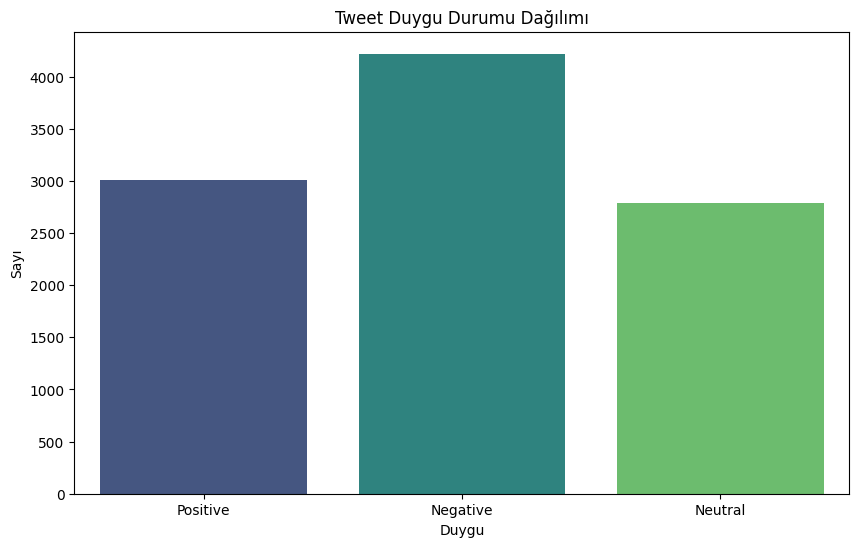

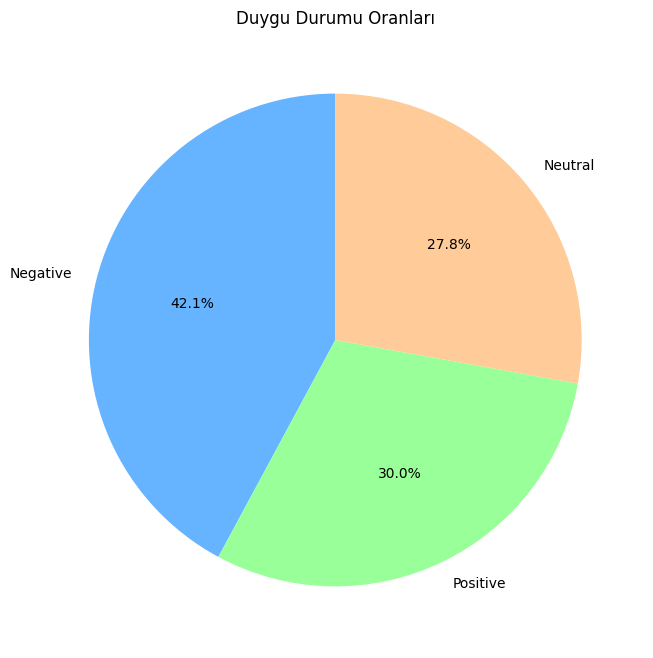

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Tweet Duygu Durumu Dağılımı')
plt.xlabel('Duygu')
plt.ylabel('Sayı')
plt.show()

# Pasta Grafiği
plt.figure(figsize=(8,8))
data['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Duygu Durumu Oranları')
plt.ylabel('')
plt.show()


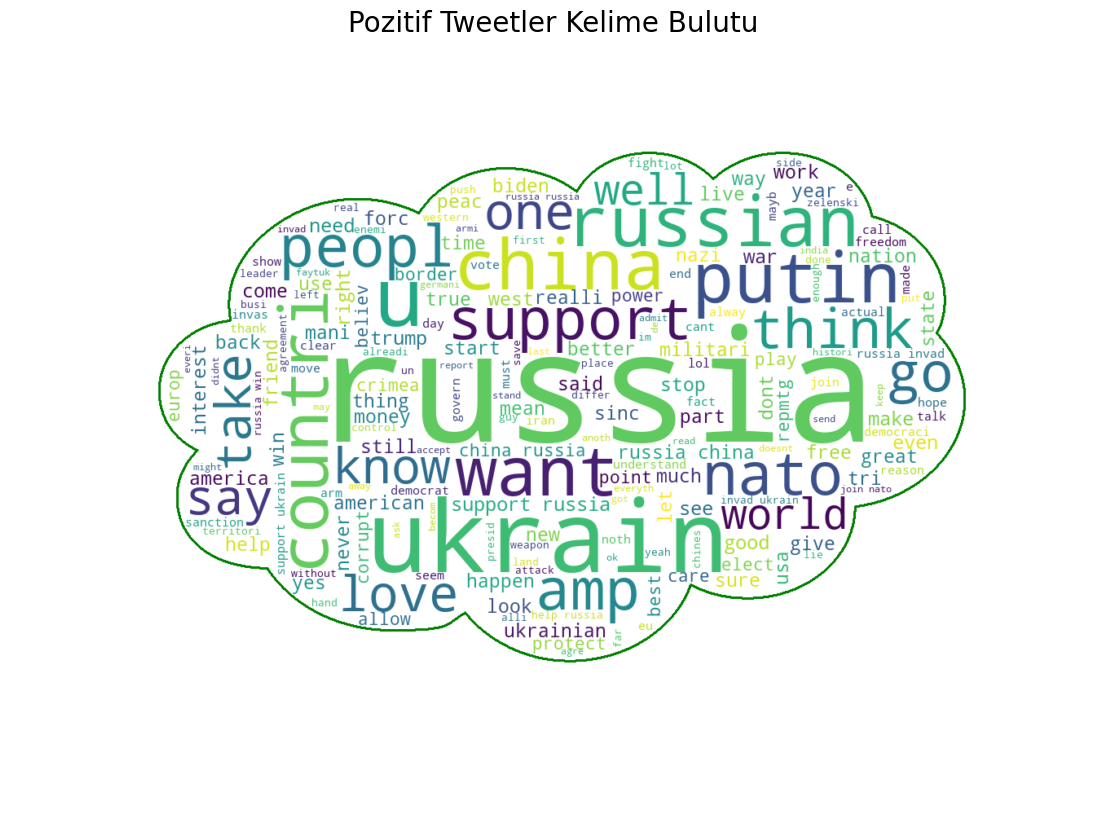

In [9]:
positive_text =' '.join([i for i in data['tweet'][data['Sentiment'] == 'Positive']])
stopwords = set(STOPWORDS)

if cloud_mask is not None:
    wordcloud_pos = WordCloud(stopwords=stopwords, 
                              background_color="white", 
                              mask=cloud_mask,
                              contour_width=3, 
                              contour_color='green').generate(positive_text)
else:
    wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white").generate(positive_text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Pozitif Tweetler Kelime Bulutu", fontsize=20)
plt.show()


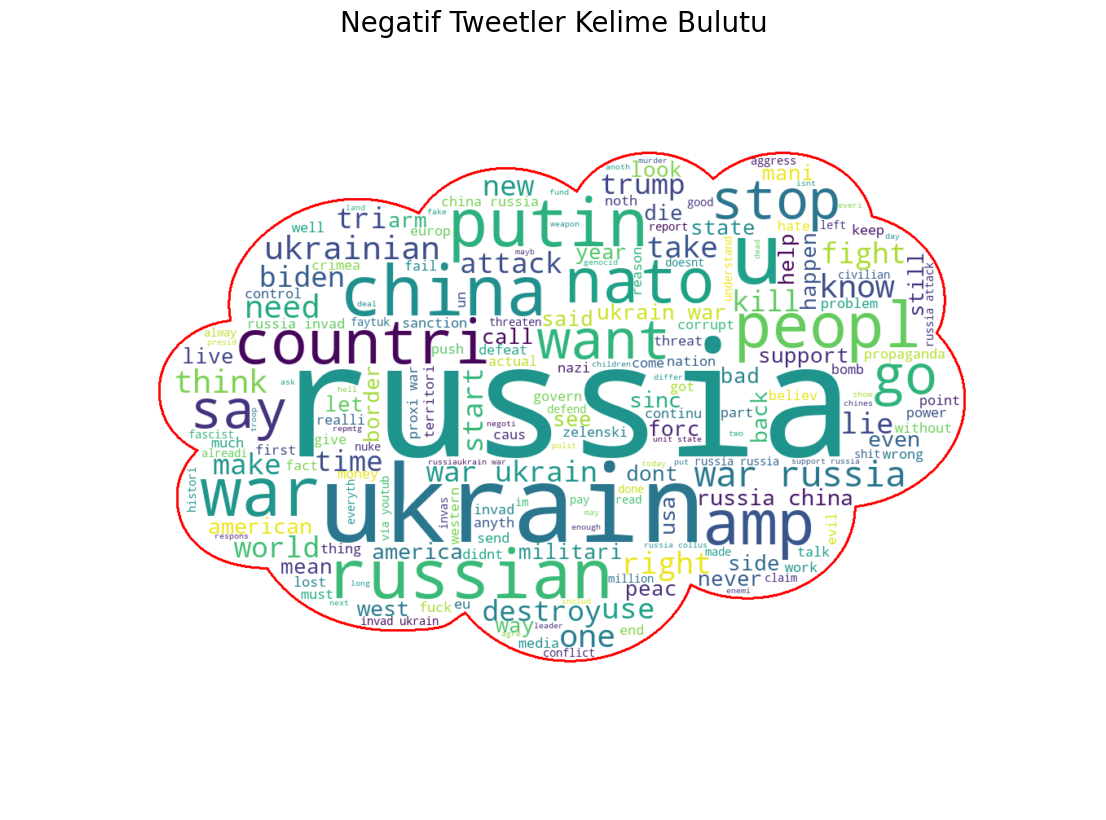

In [10]:
negative_text =' '.join([i for i in data['tweet'][data['Sentiment'] == 'Negative']])
stopwords = set(STOPWORDS)

if cloud_mask is not None:
    wordcloud_neg = WordCloud(stopwords=stopwords, 
                              background_color="white", 
                              mask=cloud_mask,
                              contour_width=3, 
                              contour_color='red').generate(negative_text)
else:
    wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negatif Tweetler Kelime Bulutu", fontsize=20)
plt.show()


# Yapılan Güncellemeler ve Sebepleri

Bu çalışmada orijinal projeye göre aşağıdaki iyileştirmeler yapılmıştır:

1.  **WordCloud Maskeleme (cloud.png)**:
    *   **Sebep**: Kullanıcının özel isteği üzerine ve görsel sunumu zenginleştirmek için kelime bulutu, standart dikdörtgen yapısı yerine 'cloud.png' görselinin şeklini alacak şekilde maskelenmiştir. Bu, analizin görsel olarak daha çekici ve konuyla (Twitter bulutu, savaşın puslu havası vb. metaforik) daha uyumlu olmasını sağlar.

2.  **Kapsamlı Duygu Analizi (Compound Score)**:
    *   **Sebep**: Orijinal kodda sadece Positive, Negative ve Neutral skorlar hesaplanmış ancak tweetin genel duygu durumu (baskın olan duygu) net bir etiketle sınıflandırılmamıştı.
    *   **Çözüm**: VADER analizinin 'Compound' skorunu kullanarak tweetler 'Positive', 'Negative' veya 'Neutral' olarak kategorize edildi. Bu, veriyi daha anlamlı bir şekilde gruplandırmamızı sağladı.

3.  **Grafiksel Görselleştirmeler**:
    *   **Sebep**: Sadece kelime bulutları, duyguların genel dağılımı hakkında sayısal bir fikir vermez.
    *   **Çözüm**: Seaborn `countplot` ve Pandas `pie chart` kullanılarak pozitif, negatif ve nötr tweetlerin sayıları ve oranları görselleştirildi. Bu sayede genel kamuoyunun eğilimi daha net görülebilir hale geldi.

4.  **Kod Yapısı**:
    *   **Sebep**: Kodun okunabilirliğini artırmak ve maske görselinin yüklenmesi gibi potansiyel hata kaynaklarını yönetmek (try-except) için ufak düzenlemeler yapıldı.
